In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Capstone-Poster.jpg to Capstone-Poster.jpg


In [ ]:
from PIL import Image

try:
    # Open the image
    with Image.open('Capstone-Poster.jpg') as img:

        # Set new DPI (300x300)
        img.info['dpi'] = (300, 300)

        # Save with explicit format and extension
        img.save('Group_14_Poster.jpg',
                format='JPEG',
                dpi=(300, 300),
                quality=95)  # Preserve quality for JPEG

except FileNotFoundError:
    print("Error: Input file not found")
except Exception as e:
    print(f"An error occurred: {str(e)}")

In [ ]:
# import packages
import numpy as np
import geopandas as gpd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pandas as pd
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error, r2_score
import datetime as dt
from sklearn import linear_model
from sklearn import model_selection
from sklearn import preprocessing
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
from scipy import stats

# suppress warning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
!pip install streamlit
!streamlit hello




  Welcome to Streamlit. Check out our demo in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://35.185.128.173:8501

  Ready to create your own Python apps super quickly?
  Head over to https://docs.streamlit.io

  May you create awesome apps!


  Stopping...
^C


In [ ]:
Xtable = pd.read_csv("Kissena_Corridor_Park_without_night.csv")
Xtable

,Date,Month,Time,Visits,Shaded_Area_Minimal,Shaded_Area_Partial,Shaded_Area_Fully,Water_Area,non_water_area,Weekday,...,Hot,Average,Cool,Clear,Cloudy,Rainy,Windy,non_windy,Athletic_Zone,Nature_and_Trail_Zone
0,4/1/2024,4,6,22.128232,1,0,0,0,1,1,...,0,0,1,0,1,0,0,1,1,0
1,4/1/2024,4,7,46.358647,1,0,0,0,1,1,...,0,0,1,0,1,0,0,1,1,0
2,4/1/2024,4,8,79.882918,1,0,0,0,1,1,...,0,0,1,0,1,0,0,1,1,0
3,4/1/2024,4,9,148.037874,1,0,0,0,1,1,...,0,0,1,0,0,1,0,1,1,0
4,4/1/2024,4,10,188.089974,1,0,0,0,1,1,...,0,0,1,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5595,9/22/2024,9,17,229.050550,0,0,1,1,0,0,...,0,0,1,1,0,0,0,1,0,1
5596,9/22/2024,9,18,192.171219,0,0,1,1,0,0,...,0,0,1,0,1,0,0,1,0,1
5597,9/22/2024,9,19,46.049327,0,0,1,1,0,0,...,0,0,1,0,1,0,0,1,0,1
5598,9/22/2024,9,20,5.980432,0,0,1,1,0,0,...,0,0,1,0,1,0,0,1,0,1


In [ ]:
Xtable=Xtable.drop(columns=['Date','Month','Time'])

In [ ]:
Xtable.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5600 entries, 0 to 5599
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Visits                 5600 non-null   float64
 1   Shaded_Area_Minimal    5600 non-null   int64  
 2   Shaded_Area_Partial    5600 non-null   int64  
 3   Shaded_Area_Fully      5600 non-null   int64  
 4   Water_Area             5600 non-null   int64  
 5   non_water_area         5600 non-null   int64  
 6   Weekday                5600 non-null   int64  
 7   Weekend                5600 non-null   int64  
 8   Summer                 5600 non-null   int64  
 9   non_summer             5600 non-null   int64  
 10  Morning                5600 non-null   int64  
 11  Afternoon              5600 non-null   int64  
 12  Evening                5600 non-null   int64  
 13  Night                  5600 non-null   int64  
 14  Extreme                5600 non-null   int64  
 15  Hot 

In [ ]:
Xtable.columns

Index(['Visits', 'Shaded_Area_Minimal', 'Shaded_Area_Partial',
       'Shaded_Area_Fully', 'Water_Area', 'non_water_area', 'Weekday',
       'Weekend', 'Summer', 'non_summer', 'Morning', 'Afternoon', 'Evening',
       'Night', 'Extreme', 'Hot', 'Average', 'Cool', 'Clear', 'Cloudy',
       'Rainy', 'Windy', 'non_windy', 'Athletic_Zone',
       'Nature_and_Trail_Zone'],
      dtype='object')

# VIC

In [ ]:
# @title
#Xtable1 = Xtable.drop(columns=['Z_Score_row','Event_bin','Holiday_bin'])
Xtable1 = Xtable.drop(columns=['Z_Score_row','Event_z'])
#Xtable1 = Xtable.drop(columns=['Visits','Event_z'])

import statsmodels.api as sm

def aic_based_selection(df, target):
    """
    基于最小AIC的特征选择
    """
    remaining = df.columns.drop(target).tolist()
    selected = []
    best_aic = float('inf')

    while remaining:
        best_feature = None
        for feature in remaining:
            trial = selected + [feature]
            X = sm.add_constant(df[trial])
            y = df[target]
            model = sm.OLS(y, X).fit()
            aic = model.aic
            if aic < best_aic:
                best_aic = aic
                best_feature = feature
        if best_feature:
            selected.append(best_feature)
            remaining.remove(best_feature)
        else:
            break
    return selected

# 使用示例
best_aic_features = aic_based_selection(Xtable1, target='Visits')

best_aic_features

['Night',
 'Shaded_Area_Minimal',
 'Morning',
 'Light_Moderate_Rain',
 'Extreme',
 'Hot',
 'Heavy_Rain_Thunderstorms',
 'Fall',
 'Clear_Partly_Cloudy',
 'Windy',
 'Afternoon',
 'Average']

In [ ]:
# @title
from itertools import combinations

def enforce_weather_features(df, target, weather_features=['Extreme', 'Hot', 'Average', 'Cool'], p_threshold=0.05):
    """
    强制选择3个天气变量，其他变量按p值筛选
    :param df: 数据框
    :param target: 目标变量名（如'Visits'）
    :param weather_features: 需要强制包含的天气变量列表
    :param p_threshold: 其他变量的p值阈值
    :return: 最佳模型和选择的特征列表
    """
    # 生成所有3个天气变量的组合
    weather_combos = list(combinations(weather_features, 2))
    best_model = None
    best_features = []

    # 遍历所有天气组合
    for weather_combo in weather_combos:
        # 强制包含的天气变量
        forced_features = list(weather_combo)
        remaining_features = df.columns.drop([target] + weather_features).tolist()

        # 初始化模型
        selected_features = forced_features.copy()
        X = sm.add_constant(df[selected_features])
        y = df[target]
        model = sm.OLS(y, X).fit()

        # 前向逐步筛选其他变量
        for feature in remaining_features:
            # 临时加入新特征
            trial_features = selected_features + [feature]
            X_trial = sm.add_constant(df[trial_features])

            try:
                trial_model = sm.OLS(y, X_trial).fit()
                p_value = trial_model.pvalues[feature]

                # 检查新特征的p值是否达标
                if p_value < p_threshold:
                    selected_features.append(feature)
                    model = trial_model
            except:
                continue  # 跳过导致共线性的变量

        # 记录最佳组合（以模型AIC为准则）
        if best_model is None or model.aic < best_model.aic:
            best_model = model
            best_features = selected_features

    return best_model, best_features

# 使用示例
if __name__ == "__main__":
    # 假设Xtable包含目标变量'Visits'和其他特征
    final_model, final_features = enforce_weather_features(Xtable1, target='Visits')

    print("\n=== 强制包含的天气变量 ===")
    weather_vars = [f for f in final_features if f in ['Extreme', 'Hot', 'Average', 'Cool']]
    print(weather_vars)

    print("\n=== 最终选择的特征 ===")
    print(final_features)

    print("\n=== 模型摘要 ===")
    print(final_model.summary())


=== 强制包含的天气变量 ===
['Extreme', 'Hot']

=== 最终选择的特征 ===
['Extreme', 'Hot', 'Shaded_Area_Minimal', 'Morning', 'Afternoon', 'Evening', 'Clear_Partly_Cloudy', 'Cloudy_Low_Visibility', 'Windy']

=== 模型摘要 ===
                            OLS Regression Results                            
Dep. Variable:                 Visits   R-squared:                       0.481
Model:                            OLS   Adj. R-squared:                  0.480
Method:                 Least Squares   F-statistic:                     863.1
Date:                Wed, 19 Mar 2025   Prob (F-statistic):               0.00
Time:                        21:58:28   Log-Likelihood:                -54381.
No. Observations:                8400   AIC:                         1.088e+05
Df Residuals:                    8390   BIC:                         1.089e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
       

# OLS

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 计算VIF值（>10表示严重共线性）
vif_data = pd.DataFrame()

selected_columns_vif = ['Weekend',
  'Summer',
  'Morning',
  'Evening',
  'Shaded_Area_Fully',
  'Extreme',
  'Hot',
  'Average',
  'Windy',
  'Rainy',
  'Cloudy']
vif_data["feature"] = selected_columns_vif
vif_data["VIF"] = [variance_inflation_factor(Xtable[selected_columns_vif].values, i) for i in range(len(selected_columns_vif))]
print(vif_data)

              feature       VIF
0             Weekend  1.437714
1              Summer  2.639473
2             Morning  1.662670
3             Evening  1.448733
4   Shaded_Area_Fully  1.699961
5             Extreme  1.080739
6                 Hot  1.180384
7             Average  1.608547
8               Windy  1.037058
9               Rainy  1.134880
10             Cloudy  2.148124


In [ ]:
from re import X
# Select desired columns from Xtable1
selected_columns_ols = ['Weekend',
  'Summer',
  'Morning',
  'Evening',
  'Shaded_Area_Fully',
  'Extreme',
  'Hot',
  'Average',
  'Windy',
  'Rainy',
  'Cloudy']
# Create formula string
formula = 'Visits ~ ' + ' + '.join(selected_columns_ols)
# Fit the OLS model
T1m = smf.ols(formula=formula, data=Xtable).fit()
# Print the model summary
T1m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Visits   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.451
Method:                 Least Squares   F-statistic:                     419.3
Date:                Mon, 31 Mar 2025   Prob (F-statistic):               0.00
Time:                        20:30:44   Log-Likelihood:                -36807.
No. Observations:                5600   AIC:                         7.364e+04
Df Residuals:                    5588   BIC:                         7.372e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           412.7392      6.397     64.520      0.000     400.199     425.280
Weekend              62.1802      5.063     12.281      0.000      52.254      72.106
Summer                9.2264      5.329      1.731      0.083      -1.221      19.674
Morning             -91.7825      5.621    -16.327      0.000    -102.803     -80.762
Evening              16.2103      6.157      2.633      0.008       4.140      28.281
Shaded_Area_Fully  -289.1490      4.641    -62.304      0.000    -298.247    -280.051
Extreme            -120.6213     19.525     -6.178      0.000    -158.897     -82.345
Hot                 -53.7868     11.946     -4.503      0.000     -77.205     -30.369
Average               7.8254      6.750      1.159      0.246      -5.407      21.057
Windy               -30.4440     13.450     -2.263      0.024     -56.812      -4.076
Rainy              -134.6651      9.813    -13.723      0.000    -153.902    -115.428
Cloudy              -24.9198      5.123     -4.864      0.000     -34.963     -14.877
==============================================================================
Omnibus:                     1352.541   Durbin-Watson:                   0.490
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5041.590
Skew:                           1.166   Prob(JB):                         0.00
Kurtosis:                       7.021   Cond. No.                         13.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
coef_df = pd.DataFrame({
    "Variable": T1m.params.index,  # Get the variable names from the model
    "Coefficient": T1m.params.values,  # Get the coefficients
    "Lower CI": T1m.conf_int()[0].values,  # Lower bound of the confidence interval
    "Upper CI": T1m.conf_int()[1].values   # Upper bound of the confidence interval
})

# Display the DataFrame
print(coef_df)

             Variable  Coefficient    Lower CI    Upper CI
0           Intercept   412.739157  400.198503  425.279811
1             Weekend    62.180208   52.254272   72.106144
2              Summer     9.226369   -1.221495   19.674233
3             Morning   -91.782495 -102.802738  -80.762253
4             Evening    16.210310    4.139635   28.280986
5   Shaded_Area_Fully  -289.148974 -298.246981 -280.050967
6             Extreme  -120.621266 -158.897127  -82.345406
7                 Hot   -53.786849  -77.204790  -30.368908
8             Average     7.825396   -5.406646   21.057438
9               Windy   -30.444018  -56.811796   -4.076241
10              Rainy  -134.665056 -153.902400 -115.427712
11             Cloudy   -24.919768  -34.962523  -14.877012


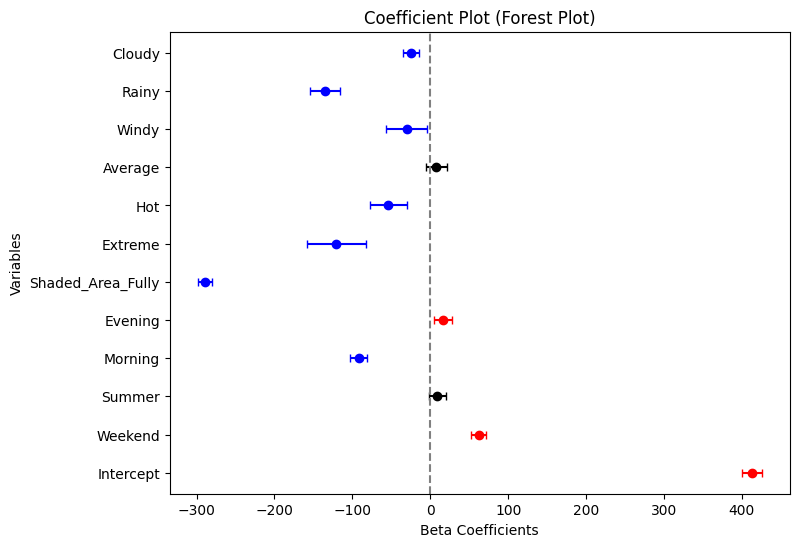

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 过滤掉 Intercept（如果需要）
coef_df = coef_df[coef_df["Variable"] != "const"]

# 创建画布
plt.figure(figsize=(8, 6))

# 遍历每个变量，手动绘制不同颜色的误差条
for i, row in coef_df.iterrows():
    lower_bound = row["Lower CI"]
    upper_bound = row["Upper CI"]

    # 判断颜色：
    if lower_bound > 0:  # 完全在右侧（正值）
        color = "red"
    elif upper_bound < 0:  # 完全在左侧（负值）
        color = "blue"
    else:  # 误差条跨过 0 轴
        color = "black"

    plt.errorbar(
        row["Coefficient"], row["Variable"],
        xerr=[[row["Coefficient"] - row["Lower CI"]], [row["Upper CI"] - row["Coefficient"]]],
        fmt='o', color=color, capsize=3
    )

# 添加参考线
plt.axvline(x=0, linestyle="--", color="gray")

# 设置标签和标题
plt.xlabel("Beta Coefficients")
plt.ylabel("Variables")
plt.title("Coefficient Plot (Forest Plot)")

# 显示图表
plt.show()


In [ ]:
formula_multi_interaction = 'Visits ~ Weekend * non_summer + Hot * Shaded_Area_Fully + Extreme * Shaded_Area_Fully'
T1m_multi = smf.ols(formula=formula_multi_interaction, data=Xtable).fit()
print(T1m_multi.summary())

                            OLS Regression Results                            
Dep. Variable:                 Visits   R-squared:                       0.394
Model:                            OLS   Adj. R-squared:                  0.393
Method:                 Least Squares   F-statistic:                     454.5
Date:                Mon, 31 Mar 2025   Prob (F-statistic):               0.00
Time:                        19:07:44   Log-Likelihood:                -37089.
No. Observations:                5600   AIC:                         7.420e+04
Df Residuals:                    5591   BIC:                         7.426e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

# Prospect Park

In [ ]:
Xtable1 = pd.read_csv("Prospect_Park_without_night.csv")
Xtable1

,Date,Month,Time,Visits,Shaded_Area_Minimal,Shaded_Area_Partial,Shaded_Area_Fully,Water_Area,non_water_area,Weekday,...,non_windy,Large_Event,Small_Event,non_event,Athletic_Zone,Entrance_Zone,Lakeside_Zone,Meadows_Zone,Trail_Zone,Villa_Green_Zone
0,2024/4/1,4,6,3.323272,1,0,0,0,1,1,...,1,0,0,1,1,0,0,0,0,0
1,2024/4/1,4,7,9.554407,1,0,0,0,1,1,...,1,0,0,1,1,0,0,0,0,0
2,2024/4/1,4,8,61.669354,1,0,0,0,1,1,...,1,0,0,1,1,0,0,0,0,0
3,2024/4/1,4,9,72.394459,1,0,0,0,1,1,...,1,0,0,1,1,0,0,0,0,0
4,2024/4/1,4,10,68.504721,1,0,0,0,1,1,...,1,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17467,2024/9/29,9,17,216.258223,0,0,1,0,1,0,...,1,0,0,1,0,0,0,0,0,1
17468,2024/9/29,9,18,163.688303,0,0,1,0,1,0,...,1,0,0,1,0,0,0,0,0,1
17469,2024/9/29,9,19,131.940193,0,0,1,0,1,0,...,1,0,0,1,0,0,0,0,0,1
17470,2024/9/29,9,20,98.130519,0,0,1,0,1,0,...,1,0,0,1,0,0,0,0,0,1


In [ ]:
Xtable1=Xtable1.drop(columns=['Date','Month','Time'])

In [ ]:
Xtable1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17472 entries, 0 to 17471
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Visits               17472 non-null  float64
 1   Shaded_Area_Minimal  17472 non-null  int64  
 2   Shaded_Area_Partial  17472 non-null  int64  
 3   Shaded_Area_Fully    17472 non-null  int64  
 4   Water_Area           17472 non-null  int64  
 5   non_water_area       17472 non-null  int64  
 6   Weekday              17472 non-null  int64  
 7   Weekend              17472 non-null  int64  
 8   Summer               17472 non-null  int64  
 9   non_summer           17472 non-null  int64  
 10  Morning              17472 non-null  int64  
 11  Afternoon            17472 non-null  int64  
 12  Evening              17472 non-null  int64  
 13  Extreme              17472 non-null  int64  
 14  Hot                  17472 non-null  int64  
 15  Average              17472 non-null 

In [ ]:
Xtable1.columns

Index(['Visits', 'Shaded_Area_Minimal', 'Shaded_Area_Partial',
       'Shaded_Area_Fully', 'Water_Area', 'non_water_area', 'Weekday',
       'Weekend', 'Summer', 'non_summer', 'Morning', 'Afternoon', 'Evening',
       'Extreme', 'Hot', 'Average', 'Cool', 'Clear', 'Cloudy', 'Rainy',
       'Windy', 'non_windy', 'Large_Event', 'Small_Event', 'non_event',
       'Athletic_Zone', 'Entrance_Zone', 'Lakeside_Zone', 'Meadows_Zone',
       'Trail_Zone', 'Villa_Green_Zone'],
      dtype='object')

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 计算VIF值（>10表示严重共线性）
vif_data = pd.DataFrame()

selected_columns_vif = ['Weekend',
  'Summer',
  'Morning',
  'Evening',
  'Shaded_Area_Fully',
  'Extreme',
  'Hot',
  'Average',
  'Windy',
  'Rainy',
  'Cloudy']
vif_data["feature"] = selected_columns_vif
vif_data["VIF"] = [variance_inflation_factor(Xtable[selected_columns_vif].values, i) for i in range(len(selected_columns_vif))]
print(vif_data)

              feature       VIF
0             Weekend  1.437714
1              Summer  2.639473
2             Morning  1.662670
3             Evening  1.448733
4   Shaded_Area_Fully  1.699961
5             Extreme  1.080739
6                 Hot  1.180384
7             Average  1.608547
8               Windy  1.037058
9               Rainy  1.134880
10             Cloudy  2.148124


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 计算VIF值（>10表示严重共线性）
vif_data = pd.DataFrame()

selected_columns_vif = ['Weekend',
  'Summer',
  'Morning',
  'Evening',
  'Shaded_Area_Fully',
  'Extreme',
  'Hot',
  'Average',
  'Windy',
  'Rainy',
  'Cloudy']
vif_data["feature"] = selected_columns_vif
vif_data["VIF"] = [variance_inflation_factor(Xtable[selected_columns_vif].values, i) for i in range(len(selected_columns_vif))]
print(vif_data)

              feature       VIF
0             Weekend  1.437714
1              Summer  2.639473
2             Morning  1.662670
3             Evening  1.448733
4   Shaded_Area_Fully  1.699961
5             Extreme  1.080739
6                 Hot  1.180384
7             Average  1.608547
8               Windy  1.037058
9               Rainy  1.134880
10             Cloudy  2.148124


In [ ]:
from re import X
# Select desired columns from Xtable1
selected_columns_ols = ['Weekend',
  'Summer',
  'Morning',
  'Evening',
  'Shaded_Area_Fully',
  'Extreme',
  'Hot',
  'Average',
  'Windy',
  'Rainy',
  'Cloudy']
# Create formula string
formula = 'Visits ~ ' + ' + '.join(selected_columns_ols)
# Fit the OLS model
T1m = smf.ols(formula=formula, data=Xtable).fit()
# Print the model summary
T1m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Visits   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.451
Method:                 Least Squares   F-statistic:                     419.3
Date:                Mon, 31 Mar 2025   Prob (F-statistic):               0.00
Time:                        20:30:44   Log-Likelihood:                -36807.
No. Observations:                5600   AIC:                         7.364e+04
Df Residuals:                    5588   BIC:                         7.372e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           412.7392      6.397     64.520      0.000     400.199     425.280
Weekend              62.1802      5.063     12.281      0.000      52.254      72.106
Summer                9.2264      5.329      1.731      0.083      -1.221      19.674
Morning             -91.7825      5.621    -16.327      0.000    -102.803     -80.762
Evening              16.2103      6.157      2.633      0.008       4.140      28.281
Shaded_Area_Fully  -289.1490      4.641    -62.304      0.000    -298.247    -280.051
Extreme            -120.6213     19.525     -6.178      0.000    -158.897     -82.345
Hot                 -53.7868     11.946     -4.503      0.000     -77.205     -30.369
Average               7.8254      6.750      1.159      0.246      -5.407      21.057
Windy               -30.4440     13.450     -2.263      0.024     -56.812      -4.076
Rainy              -134.6651      9.813    -13.723      0.000    -153.902    -115.428
Cloudy              -24.9198      5.123     -4.864      0.000     -34.963     -14.877
==============================================================================
Omnibus:                     1352.541   Durbin-Watson:                   0.490
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5041.590
Skew:                           1.166   Prob(JB):                         0.00
Kurtosis:                       7.021   Cond. No.                         13.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

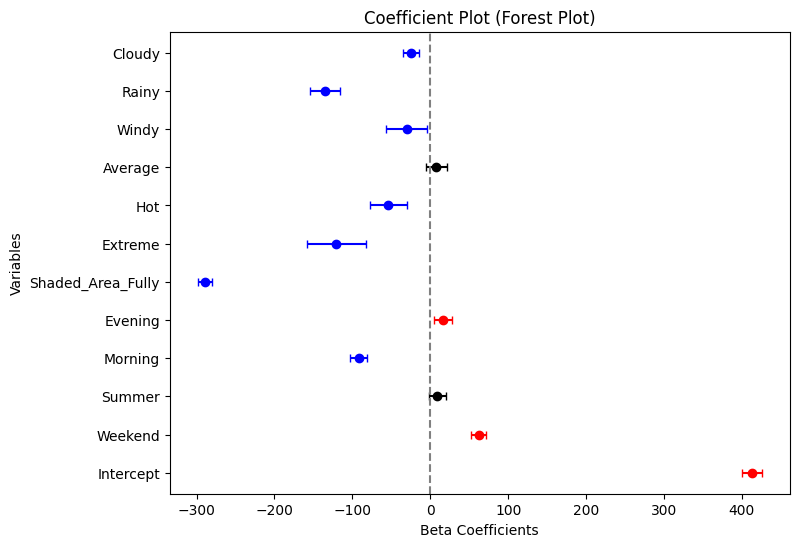

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 过滤掉 Intercept（如果需要）
coef_df = coef_df[coef_df["Variable"] != "const"]

# 创建画布
plt.figure(figsize=(8, 6))

# 遍历每个变量，手动绘制不同颜色的误差条
for i, row in coef_df.iterrows():
    lower_bound = row["Lower CI"]
    upper_bound = row["Upper CI"]

    # 判断颜色：
    if lower_bound > 0:  # 完全在右侧（正值）
        color = "red"
    elif upper_bound < 0:  # 完全在左侧（负值）
        color = "blue"
    else:  # 误差条跨过 0 轴
        color = "black"

    plt.errorbar(
        row["Coefficient"], row["Variable"],
        xerr=[[row["Coefficient"] - row["Lower CI"]], [row["Upper CI"] - row["Coefficient"]]],
        fmt='o', color=color, capsize=3
    )

# 添加参考线
plt.axvline(x=0, linestyle="--", color="gray")

# 设置标签和标题
plt.xlabel("Beta Coefficients")
plt.ylabel("Variables")
plt.title("Coefficient Plot (Forest Plot)")

# 显示图表
plt.show()


# Z-score-Row

In [ ]:
from re import X
# Select desired columns from Xtable1
selected_columns_ols = ['Weekend',
  'Fall',
  'Spring',
  'Morning',
  'Afternoon',
  'Evening',
  'Shaded_Area_Fully',
  'Extreme',
  'Hot',
  'Average',
  'Clear_Partly_Cloudy',
  'Light_Moderate_Rain',
  'Windy',
  'Holiday']
# Create formula string
formula = 'Z_Score_row ~ ' + ' + '.join(selected_columns_ols)
# Fit the OLS model
T1m = smf.ols(formula=formula, data=Xtable).fit()
# Print the model summary
T1m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Z_Score_row   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.072
Method:                 Least Squares   F-statistic:                     47.59
Date:                Sun, 23 Mar 2025   Prob (F-statistic):          7.68e-128
Time:                        04:22:41   Log-Likelihood:                -11474.
No. Observations:                8400   AIC:                         2.298e+04
Df Residuals:                    8385   BIC:                         2.308e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.1100      0.027      4.111      0.000       0.058       0.162
Weekend                 0.0031      0.023      0.135      0.893      -0.042       0.048
Fall                   -0.1693      0.032     -5.246      0.000      -0.233      -0.106
Spring                 -0.2970      0.025    -11.789      0.000      -0.346      -0.248
Morning                 0.0719      0.028      2.603      0.009       0.018       0.126
Afternoon               0.1875      0.030      6.297      0.000       0.129       0.246
Evening                 0.0893      0.031      2.840      0.005       0.028       0.151
Shaded_Area_Fully       0.0824      0.021      3.969      0.000       0.042       0.123
Extreme                -0.9345      0.106     -8.811      0.000      -1.142      -0.727
Hot                    -0.7189      0.062    -11.521      0.000      -0.841      -0.597
Average                -0.2316      0.033     -6.999      0.000      -0.297      -0.167
Clear_Partly_Cloudy     0.1555      0.023      6.910      0.000       0.111       0.200
Light_Moderate_Rain    -0.6342      0.044    -14.536      0.000      -0.720      -0.549
Windy                  -0.3342      0.069     -4.851      0.000      -0.469      -0.199
Holiday                -0.0118      0.069     -0.170      0.865      -0.148       0.124
==============================================================================
Omnibus:                     2074.248   Durbin-Watson:                   0.434
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5735.720
Skew:                           1.307   Prob(JB):                         0.00
Kurtosis:                       6.091   Cond. No.                         13.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
coef_df = pd.DataFrame({
    "Variable": T1m.params.index,  # Get the variable names from the model
    "Coefficient": T1m.params.values,  # Get the coefficients
    "Lower CI": T1m.conf_int()[0].values,  # Lower bound of the confidence interval
    "Upper CI": T1m.conf_int()[1].values   # Upper bound of the confidence interval
})

# Display the DataFrame
print(coef_df)

               Variable  Coefficient  Lower CI  Upper CI
0             Intercept     0.110010  0.057558  0.162462
1               Weekend     0.003090 -0.041871  0.048050
2                  Fall    -0.169344 -0.232624 -0.106063
3                Spring    -0.297015 -0.346403 -0.247628
4               Morning     0.071851  0.017735  0.125966
5             Afternoon     0.187541  0.129158  0.245924
6               Evening     0.089254  0.027643  0.150865
7     Shaded_Area_Fully     0.082427  0.041713  0.123141
8               Extreme    -0.934493 -1.142403 -0.726584
9                   Hot    -0.718931 -0.841254 -0.596607
10              Average    -0.231638 -0.296514 -0.166761
11  Clear_Partly_Cloudy     0.155503  0.111389  0.199616
12  Light_Moderate_Rain    -0.634248 -0.719777 -0.548719
13                Windy    -0.334179 -0.469221 -0.199137
14              Holiday    -0.011808 -0.148041  0.124424


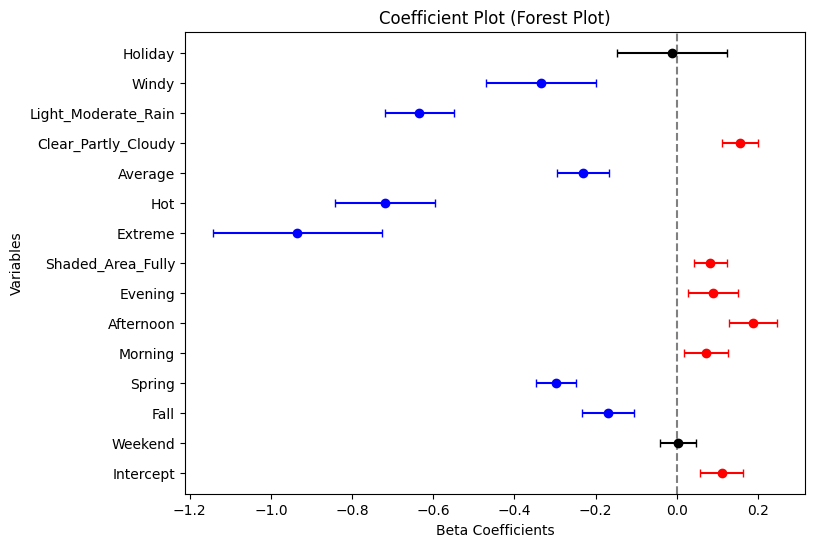

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 过滤掉 Intercept（如果需要）
coef_df = coef_df[coef_df["Variable"] != "const"]

# 创建画布
plt.figure(figsize=(8, 6))

# 遍历每个变量，手动绘制不同颜色的误差条
for i, row in coef_df.iterrows():
    lower_bound = row["Lower CI"]
    upper_bound = row["Upper CI"]

    # 判断颜色：
    if lower_bound > 0:  # 完全在右侧（正值）
        color = "red"
    elif upper_bound < 0:  # 完全在左侧（负值）
        color = "blue"
    else:  # 误差条跨过 0 轴
        color = "black"

    plt.errorbar(
        row["Coefficient"], row["Variable"],
        xerr=[[row["Coefficient"] - row["Lower CI"]], [row["Upper CI"] - row["Coefficient"]]],
        fmt='o', color=color, capsize=3
    )

# 添加参考线
plt.axvline(x=0, linestyle="--", color="gray")

# 设置标签和标题
plt.xlabel("Beta Coefficients")
plt.ylabel("Variables")
plt.title("Coefficient Plot (Forest Plot)")

# 显示图表
plt.show()


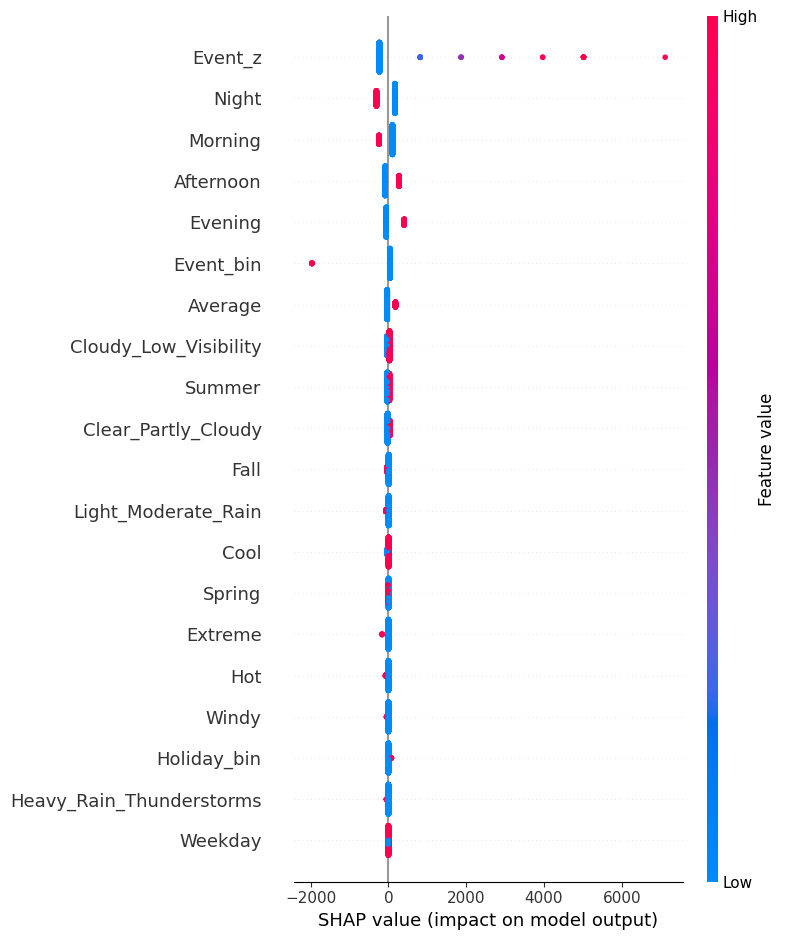

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# 假设 Xtable 已经加载到内存，且包含所有变量
features = ['Weekday', 'Weekend', 'Spring', 'Summer', 'Fall', 'Morning', 'Afternoon',
            'Evening', 'Night', 'Extreme', 'Hot', 'Average', 'Cool', 'Clear_Partly_Cloudy',
            'Cloudy_Low_Visibility', 'Light_Moderate_Rain', 'Heavy_Rain_Thunderstorms',
            'Windy', 'Event_z', 'Event_bin', 'Holiday_bin']

# 自变量 X 和因变量 y
X = Xtable[features]
y = Xtable['Visits']

# 分割数据为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 构建 Ridge 回归模型（可根据需要调整 alpha）
model = Ridge(alpha=1.0)
model.fit(X_train, y_train)

# 使用 SHAP 的 LinearExplainer（适用于线性模型）
explainer = shap.LinearExplainer(model, X_train)
shap_values = explainer.shap_values(X_test)

# 绘制 SHAP 总结图，展示各特征对预测的贡献情况
shap.summary_plot(shap_values, X_test)

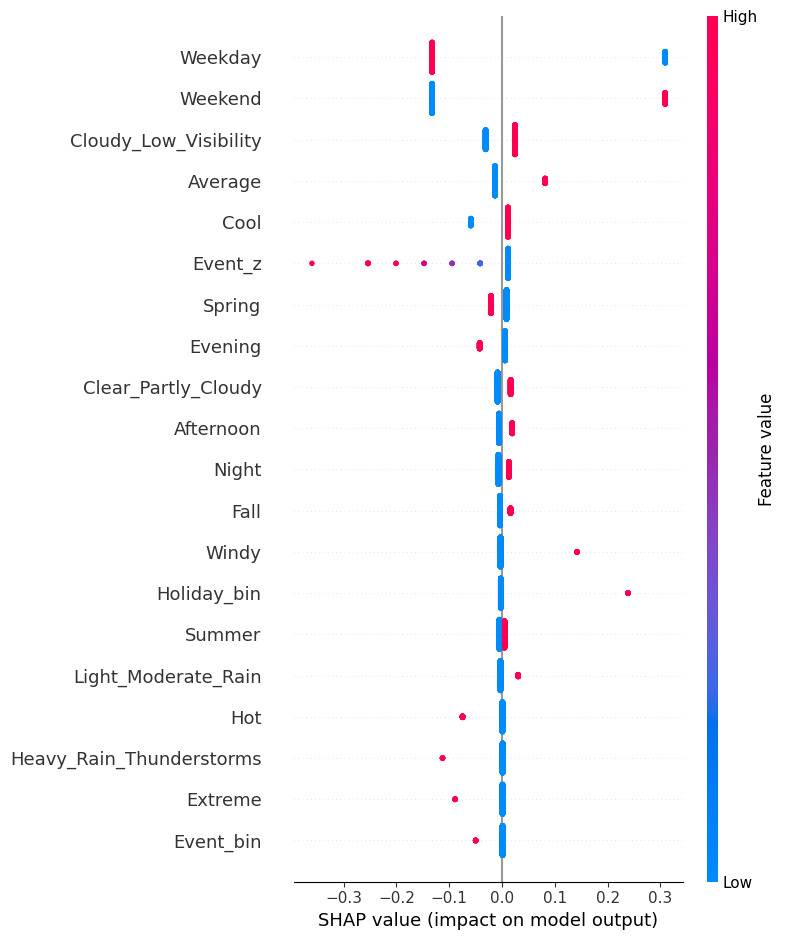

In [ ]:
# 自变量 X 和因变量 y
X = Xtable[features]
y = Xtable['Z_Score_row']

# 分割数据为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 构建 Ridge 回归模型（可根据需要调整 alpha）
model = Ridge(alpha=1.0)
model.fit(X_train, y_train)

# 使用 SHAP 的 LinearExplainer（适用于线性模型）
explainer = shap.LinearExplainer(model, X_train)
shap_values = explainer.shap_values(X_test)

# 绘制 SHAP 总结图，展示各特征对预测的贡献情况
shap.summary_plot(shap_values, X_test)

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error

# 自变量 X 和因变量 y
X = Xtable[features]
y = Xtable['Z_Score_row']

# 划分训练集和测试集（80%训练，20%测试）
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 构建 Ridge 回归模型，设置正则化参数 alpha（可调节）
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

# 在测试集上预测，并计算均方误差（MSE）
y_pred = ridge_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

# 使用 GridSearchCV 对正则化参数 alpha 进行调优
alphas = np.logspace(-3, 3, 50)  # 从0.001到1000之间50个候选值
param_grid = {'alpha': alphas}
ridge_cv = GridSearchCV(Ridge(), param_grid, scoring='neg_mean_squared_error', cv=5)
ridge_cv.fit(X_train, y_train)
print("Best alpha:", ridge_cv.best_params_)

# 使用最优参数构建模型，并在测试集上评价
best_model = ridge_cv.best_estimator_
y_pred_best = best_model.predict(X_test)
mse_best = mean_squared_error(y_test, y_pred_best)
print("MSE with best model:", mse_best)

MSE: 0.7984366688237057
Best alpha: {'alpha': 59.636233165946365}
MSE with best model: 0.797941655203306


In [ ]:
# 自变量 X 和因变量 y
X = Xtable[features]
y = Xtable['Visits']

# 划分训练集和测试集（80%训练，20%测试）
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 构建 Ridge 回归模型，设置正则化参数 alpha（可调节）
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

# 在测试集上预测，并计算均方误差（MSE）
y_pred = ridge_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

# 使用 GridSearchCV 对正则化参数 alpha 进行调优
alphas = np.logspace(-3, 3, 50)  # 从0.001到1000之间50个候选值
param_grid = {'alpha': alphas}
ridge_cv = GridSearchCV(Ridge(), param_grid, scoring='neg_mean_squared_error', cv=5)
ridge_cv.fit(X_train, y_train)
print("Best alpha:", ridge_cv.best_params_)

# 使用最优参数构建模型，并在测试集上评价
best_model = ridge_cv.best_estimator_
y_pred_best = best_model.predict(X_test)
mse_best = mean_squared_error(y_test, y_pred_best)
print("MSE with best model:", mse_best)

MSE: 558985.8312606071
Best alpha: {'alpha': 0.001}
MSE with best model: 559335.3710302785
